In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('wine_data.csv' ,  header= None, usecols= [0,1,2])
df.columns = ['Class label', 'Alcohol', 'Malic acid']
df.tail()

,Class label,Alcohol,Malic acid
173,3,13.71,5.65
174,3,13.40,3.91
175,3,13.27,4.28
176,3,13.17,2.59
177,3,14.13,4.10


<Axes: xlabel='Alcohol', ylabel='Density'>

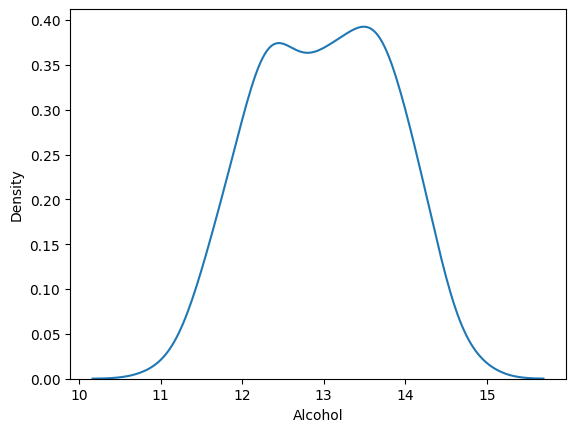

In [4]:
sns.kdeplot(df['Alcohol'])


In [13]:
X = df.drop('Class label', axis=1)
y = df['Class label']

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


In [15]:
X_train.shape, X_test.shape


((124, 2), (54, 2))

In [16]:
from sklearn.preprocessing import MinMaxScaler
mn = MinMaxScaler()
mn.fit(X_train)
X_train_std = mn.transform(X_train)
X_test_std = mn.transform(X_test)

In [17]:
X_train_std = pd.DataFrame(X_train_std, columns= X_train.columns)
X_test_std = pd.DataFrame(X_test_std, columns=X_test.columns)

In [18]:
np.round(X_train.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,13.0,2.4
std,0.8,1.1
min,11.0,0.9
25%,12.4,1.6
50%,13.0,1.9
75%,13.6,3.2
max,14.8,5.6


In [19]:
np.round(X_train_std.describe(), 1)

,Alcohol,Malic acid
count,124.0,124.0
mean,0.5,0.3
std,0.2,0.2
min,0.0,0.0
25%,0.4,0.2
50%,0.5,0.2
75%,0.7,0.5
max,1.0,1.0


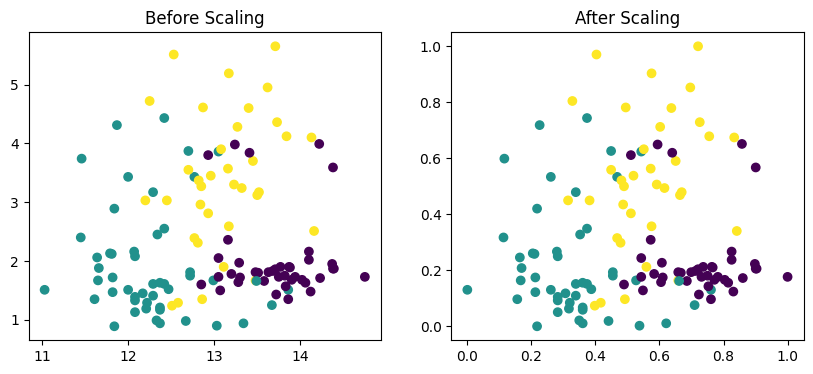

In [12]:
fig , (ax1, ax2) = plt.subplots(ncols=2, figsize=(10,4))
ax1.scatter(X_train['Alcohol'], X_train['Malic acid'] , c=y_train)
ax1.set_title('Before Scaling')
ax2.scatter(X_train_std['Alcohol'], X_train_std['Malic acid'], c=y_train)
ax2.set_title('After Scaling')
plt.show()